# Using complex Memory Schemas for advanced operations
* In the previous exercise we saved the LT memory as a string. In this one, we will learn how to use a more sophisticated schema and make use of it for advanced operations.

## Setup

#### After you download the code from the github repository in your computer
In terminal:
* cd project_name
* pyenv local 3.11.4
* poetry install
* poetry shell

#### To open the notebook with Jupyter Notebooks
In terminal:
* jupyter lab

Go to the folder of notebooks and open the right notebook.

#### To see the code in Virtual Studio Code or your editor of choice.
* open Virtual Studio Code or your editor of choice.
* open the project-folder
* open the 026-profile-schema.py file

## Create your .env file
* In the github repo we have included a file named .env.example
* Rename that file to .env file and here is where you will add your confidential api keys. Remember to include:
* OPENAI_API_KEY=your_openai_api_key
* LANGCHAIN_TRACING_V2=true
* LANGCHAIN_ENDPOINT=https://api.smith.langchain.com
* LANGCHAIN_API_KEY=your_langchain_api_key
* LANGCHAIN_PROJECT=your_project_name

We will call our LangSmith project **001-langgraph**.

## Track operations
From now on, we can track the operations **and the cost** of this project from LangSmith:
* [smith.langchain.com](https://smith.langchain.com)

## Connect with the .env file located in the same directory of this notebook

If you are using the pre-loaded poetry shell, you do not need to install the following package because it is already pre-loaded for you:

In [1]:
#pip install python-dotenv

In [2]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())
openai_api_key = os.environ["OPENAI_API_KEY"]

#### Install LangChain

If you are using the pre-loaded poetry shell, you do not need to install the following package because it is already pre-loaded for you:

In [3]:
#!pip install langchain

## Connect with an LLM

If you are using the pre-loaded poetry shell, you do not need to install the following package because it is already pre-loaded for you:

In [4]:
#!pip install langchain-openai

In [5]:
from langchain_openai import ChatOpenAI

chatModel35 = ChatOpenAI(model="gpt-3.5-turbo-0125")
chatModel4o = ChatOpenAI(model="gpt-4o")

## Defining the format of our User Profile memory

In [6]:
from typing import TypedDict, List

class UserProfile(TypedDict):
    """User profile schema with typed fields"""
    user_name: str  # The user's preferred name
    interests: List[str]  # A list of the user's interests

## Let's explain what we just did

This code defines a **custom data structure** called `UserProfile` using Python's `TypedDict`. Here's a breakdown in simple terms:

1. **Purpose**: It describes how a user profile should be organized and what kind of data it should contain. This helps make the code clearer and prevents errors.

2. **Import Statements**:  
   - `TypedDict` is imported to create a structured dictionary with specific types for each value.  
   - `List` is imported to specify that one of the fields will contain a list of items.

3. **Defining `UserProfile`:**  
   - It is a **dictionary-like structure** where keys and their corresponding value types are predefined.  
   - The `user_name` key must contain a **string** (str).  
   - The `interests` key must contain a **list of strings** (List[str]).

4. **Comment Explanation**:  
   - Each field has a comment explaining its purpose:
     - `user_name`: The preferred name of the user.  
     - `interests`: A list of things the user is interested in.

#### Example Usage:
```python
profile: UserProfile = {
    "user_name": "Alice",
    "interests": ["coding", "reading", "music"]
}
```

In this example:
- `"user_name"` is a string, `"Alice"`.  
- `"interests"` is a list of strings, `["coding", "reading", "music"]`.  

## Let's now use the previous User Profile schema to save the data of our first user in the Memory Store

In [7]:
# TypedDict instance
user_profile: UserProfile = {
    "user_name": "Julio",
    "interests": ["vespa", "AI", "SF"]
}

In [8]:
import uuid
from langgraph.store.memory import InMemoryStore

# Initialize the in-memory store
in_memory_store = InMemoryStore()

# Namespace for the memory to save
user_id = "1"
namespace_for_memory = (user_id, "memory")

# Save a memory to namespace as key and value
key = "user_profile"
value = user_profile
in_memory_store.put(namespace_for_memory, key, value)

## Let's explain the previous code in simple terms

The previous code builds on the earlier `UserProfile` example and demonstrates how to **store user data in memory** using the `InMemoryStore` class from LangGraph. Here's a simple explanation step-by-step:

#### Create a User Profile
```python
user_profile: UserProfile = {
    "user_name": "Julio",
    "interests": ["vespa", "AI", "SF"]
}
```
- A **user profile** dictionary is created based on the `UserProfile` structure.  
- It has:
  - **user_name** = "Julio"  
  - **interests** = ["vespa", "AI", "SF"]

#### Import Required Modules
```python
import uuid
from langgraph.store.memory import InMemoryStore
```
- **`uuid`**: Useful for generating unique identifiers (not used in this snippet yet, but might be used later).  
- **`InMemoryStore`**: A tool provided by LangGraph to **store data temporarily** in memory.  

#### Initialize Memory Storage
```python
in_memory_store = InMemoryStore()
```
- An **instance** of `InMemoryStore` is created to **store data in memory**.

#### Define a Namespace for Storage
```python
user_id = "1"
namespace_for_memory = (user_id, "memory")
```
- **user_id = "1"**: Represents the ID of the user (e.g., Julio).  
- **namespace_for_memory = (user_id, "memory")**: Combines the user ID and a label ("memory") to create a **unique namespace** for storing the user's data.  

#### Save Data in Memory
```python
key = "user_profile"
value = user_profile
in_memory_store.put(namespace_for_memory, key, value)
```
- **key = "user_profile"**: Specifies a **label** for the stored data.  
- **value = user_profile**: Stores the earlier-defined `user_profile`.  
- **`put()`**: Saves the data in memory using:
  - **Namespace**: `(user_id, "memory")` – Keeps data organized per user or context.  
  - **Key-Value Pair**: `"user_profile"` → `{user_name: "Julio", interests: [...]}`.

#### What Happens in Memory?
The data is stored like this:
```
{
  ("1", "memory"): {
      "user_profile": {
          "user_name": "Julio",
          "interests": ["vespa", "AI", "SF"]
      }
  }
}

## OK. Let's now see how to retrieve this information from the Memory Store.
* As we learned in the previous exercise, we can use [search](https://langchain-ai.github.io/langgraph/reference/store/#langgraph.store.base.BaseStore.search) to retrieve objects from the store by namespace.

In [9]:
# Search 
for m in in_memory_store.search(namespace_for_memory):
    print(m.dict())

{'value': {'user_name': 'Julio', 'interests': ['vespa', 'AI', 'SF']}, 'key': 'user_profile', 'namespace': ['1', 'memory'], 'created_at': '2025-01-07T08:48:22.047331+00:00', 'updated_at': '2025-01-07T08:48:22.047333+00:00', 'score': None}


* As you remember, we can also use [get](https://langchain-ai.github.io/langgraph/reference/store/#langgraph.store.base.BaseStore.get) to retrieve a specific object by namespace and key. 

In [10]:
# Get the memory by namespace and key
profile = in_memory_store.get(namespace_for_memory, "user_profile")
profile.value

{'user_name': 'Julio', 'interests': ['vespa', 'AI', 'SF']}

## If we bind the UserProfile schema with the LLM model, our app will respond with structured output

In [11]:
from pydantic import BaseModel, Field

from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI

# Initialize the model
model = ChatOpenAI(model="gpt-4o", temperature=0)

# PAY ATTENTION HERE: see how we use the UserProfile schema
# Bind schema to model
model_with_structure = model.with_structured_output(UserProfile)

# PAY ATTENTION HERE: Using the bound model, now the app 
# will respond with structured output.
# Invoke the model to produce structured output that matches the schema
structured_output = model_with_structure.invoke([HumanMessage("My name is Julio, I like to drive my vespa.")])
structured_output

{'user_name': 'Julio', 'interests': ['driving vespa']}

## Let's review what we just did

The previous code builds on the previous example and shows how to **use AI to process text input and generate structured data** that matches the `UserProfile` schema. Here's a simple explanation step-by-step:

#### Import Required Libraries
```python
from pydantic import BaseModel, Field
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
```

- **`pydantic`**: Helps define and validate data structures (not directly used here but is compatible with the schema).  
- **`HumanMessage`**: Represents a message written by a human, simulating user input.  
- **`ChatOpenAI`**: Connects to OpenAI's GPT model for generating responses.

#### Initialize the Chat Model
```python
model = ChatOpenAI(model="gpt-4o", temperature=0)
```
- **`ChatOpenAI`**: Initializes an AI model (GPT-4o).  
- **`model="gpt-4o"`**: Specifies the version of the AI model to use.  
- **`temperature=0`**: Controls randomness—0 means the output is **consistent and predictable**.

#### Bind Schema to the Model
```python
model_with_structure = model.with_structured_output(UserProfile)
```
- **Purpose**: Ensures the model's output matches the **`UserProfile` schema** defined earlier.  
- **Key Idea**: Forces the AI to **format its response as structured data** (dictionary) with fields like:
  - `user_name` (string)  
  - `interests` (list of strings).

#### Process Human Input
```python
structured_output = model_with_structure.invoke(
    [HumanMessage("My name is Julio, I like to drive my vespa.")]
)
```
- **Input**: Simulates a human message: `"My name is Julio, I like to drive my vespa."`  
- **`invoke()`**: Processes the input using the AI model and outputs data that fits the schema.  
- **Structured Output**: The AI analyzes the text and returns the data in the required format.

#### What Does the Output Look Like?
The output is formatted as a **valid `UserProfile` dictionary**, like this:
```python
{
    "user_name": "Julio",
    "interests": ["vespa"]
}
```

#### How Does It Work?
1. **AI Processes the Message**:  
   - Extracts the name ("Julio").  
   - Identifies the interest ("vespa").  

2. **Schema Validation**:  
   - Ensures the output matches the `UserProfile` structure.  
   - Returns structured data, not plain text.

#### Example Use Case
Imagine building a chatbot that collects user profiles for recommendations. Instead of manually parsing user messages, the AI automatically extracts and structures the information.

## We can now add this change to the chatbot with long-term memory we built in the previous exercise
* PAY ATTENTION: see how we use the `new_memory` variable below.

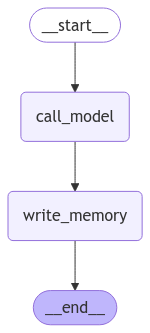

In [12]:
from IPython.display import Image, display

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.store.base import BaseStore

from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
from langchain_core.runnables.config import RunnableConfig

# Chatbot instruction
MODEL_SYSTEM_MESSAGE = """You are a helpful assistant with memory that provides information about the user. 
If you have memory for this user, use it to personalize your responses.
Here is the memory (it may be empty): {memory}"""

# Create new memory from the chat history and any existing memory
CREATE_MEMORY_INSTRUCTION = """Create or update a user profile memory based on the user's chat history. 
This will be saved for long-term memory. If there is an existing memory, simply update it. 
Here is the existing memory (it may be empty): {memory}"""

def call_model(state: MessagesState, config: RunnableConfig, store: BaseStore):

    """Load memory from the store and use it to personalize the chatbot's response."""
    
    # Get the user ID from the config
    user_id = config["configurable"]["user_id"]

    # Retrieve memory from the store
    namespace = ("memory", user_id)
    existing_memory = store.get(namespace, "user_memory")

    # Format the memories for the system prompt
    if existing_memory and existing_memory.value:
        memory_dict = existing_memory.value
        formatted_memory = (
            f"Name: {memory_dict.get('user_name', 'Unknown')}\n"
            f"Interests: {', '.join(memory_dict.get('interests', []))}"
        )
    else:
        formatted_memory = None

    # Format the memory in the system prompt
    system_msg = MODEL_SYSTEM_MESSAGE.format(memory=formatted_memory)

    # Respond using memory as well as the chat history
    response = model.invoke([SystemMessage(content=system_msg)]+state["messages"])

    return {"messages": response}

def write_memory(state: MessagesState, config: RunnableConfig, store: BaseStore):

    """Reflect on the chat history and save a memory to the store."""
    
    # Get the user ID from the config
    user_id = config["configurable"]["user_id"]

    # Retrieve existing memory from the store
    namespace = ("memory", user_id)
    existing_memory = store.get(namespace, "user_memory")

    # Format the memories for the system prompt
    if existing_memory and existing_memory.value:
        memory_dict = existing_memory.value
        formatted_memory = (
            f"Name: {memory_dict.get('user_name', 'Unknown')}\n"
            f"Interests: {', '.join(memory_dict.get('interests', []))}"
        )
    else:
        formatted_memory = None
        
    # Format the existing memory in the instruction
    system_msg = CREATE_MEMORY_INSTRUCTION.format(memory=formatted_memory)

    # PAY ATTENTION: here is where we define the new_memory variable.
    # Invoke the model to produce structured output that matches the schema
    new_memory = model_with_structure.invoke([SystemMessage(content=system_msg)]+state['messages'])

    # Overwrite the existing use profile memory
    key = "user_memory"
    store.put(namespace, key, new_memory)

# Define the graph
builder = StateGraph(MessagesState)
builder.add_node("call_model", call_model)
builder.add_node("write_memory", write_memory)
builder.add_edge(START, "call_model")
builder.add_edge("call_model", "write_memory")
builder.add_edge("write_memory", END)

# Store for long-term (across-thread) memory
across_thread_memory = InMemoryStore()

# Checkpointer for short-term (within-thread) memory
within_thread_memory = MemorySaver()

# Compile the graph with the checkpointer fir and store
graph = builder.compile(checkpointer=within_thread_memory, store=across_thread_memory)

# View
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

## This code is very similar to the one we used in the last exercise

The previous code creates a **chatbot with memory** using LangGraph, OpenAI's GPT, and structured memory storage. It ensures the chatbot can **remember user information** and **update its memory** based on new conversations. Here's a simple explanation step-by-step:

#### Import Required Libraries
```python
from IPython.display import Image, display
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.store.base import BaseStore

from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
from langchain_core.runnables.config import RunnableConfig
```
- Libraries for **memory management**, **graph-based workflows**, and **message handling** are imported.  
- `Image` and `display` are used to **visualize the workflow graph** later.

#### System Messages and Instructions
```python
MODEL_SYSTEM_MESSAGE = """You are a helpful assistant with memory... {memory}"""
CREATE_MEMORY_INSTRUCTION = """Create or update a user profile memory... {memory}"""
```
- These define **system prompts** for the AI.  
- **`MODEL_SYSTEM_MESSAGE`**: Guides the chatbot to **use memory** (if available) to **personalize responses**.  
- **`CREATE_MEMORY_INSTRUCTION`**: Guides the chatbot to **update memory** after each interaction.

#### Chatbot Response Function
```python
def call_model(state: MessagesState, config: RunnableConfig, store: BaseStore):
```
This function generates **responses** for the chatbot by:

1. **Fetching Memory:**
```python
user_id = config["configurable"]["user_id"]
namespace = ("memory", user_id)
existing_memory = store.get(namespace, "user_memory")
```
- Retrieves memory for the user (if it exists) based on their **user ID**.

2. **Formatting Memory:**
```python
formatted_memory = (
    f"Name: {memory_dict.get('user_name', 'Unknown')}\n"
    f"Interests: {', '.join(memory_dict.get('interests', []))}"
)
```
- Prepares memory (e.g., name and interests) as a **text summary** for the AI.

3. **Generating Response:**
```python
response = model.invoke([SystemMessage(content=system_msg)] + state["messages"])
```
- Combines memory with chat history and **invokes the AI model** to generate a personalized response.

#### Memory Update Function
```python
def write_memory(state: MessagesState, config: RunnableConfig, store: BaseStore):
```
This function **updates the memory** after processing a user's message:

1. **Fetch Existing Memory:** Same as before—loads memory from the store.  
2. **Format Memory Instruction:**  
```python
system_msg = CREATE_MEMORY_INSTRUCTION.format(memory=formatted_memory)
```
- Prepares instructions for the AI to **update memory** based on the latest chat.  
3. **Invoke Model for Memory Update:**
```python
new_memory = model_with_structure.invoke([SystemMessage(content=system_msg)]+state['messages'])
```
- AI updates the memory (e.g., adds new interests).  
4. **Save Updated Memory:**
```python
store.put(namespace, key, new_memory)
```
- Overwrites the **user memory** in the store.

#### Workflow Graph Definition
```python
builder = StateGraph(MessagesState)
```
- Defines a **graph-based workflow** to control the chatbot's process step-by-step.

**Nodes and Edges:**
```python
builder.add_node("call_model", call_model)
builder.add_node("write_memory", write_memory)
builder.add_edge(START, "call_model")
builder.add_edge("call_model", "write_memory")
builder.add_edge("write_memory", END)
```
- **Nodes**: Steps in the process (response generation → memory update).  
- **Edges**: Defines the **sequence** of steps.  
  - Start → Respond → Update Memory → End.

#### Memory Setup
```python
across_thread_memory = InMemoryStore()
within_thread_memory = MemorySaver()
```
- **`across_thread_memory`**: Long-term memory (persists between sessions).  
- **`within_thread_memory`**: Short-term memory (temporary during the conversation).

#### Compile and Visualize Workflow
```python
graph = builder.compile(checkpointer=within_thread_memory, store=across_thread_memory)
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))
```
- **Compiles** the graph with memory systems attached.  
- **Visualizes** the workflow as a **diagram** to show how steps connect.

#### Example Scenario
1. **User Input:** "My name is Julio, and I like AI."  
2. **Response:** "Hi Julio! AI is fascinating. What else are you interested in?"  
3. **Memory Update:** Saves `"Julio"` as the name and adds `"AI"` to interests.  
4. **Next Interaction:** "Tell me about robots."  
5. **Response:** "Since you like AI, you might also enjoy learning about robots!"

## Let's try this new chatbot and see how it saves the user information in the User Profile memory

In [13]:
# We supply a thread ID for short-term (within-thread) memory
# We supply a user ID for long-term (across-thread) memory 
config = {"configurable": {"thread_id": "1", "user_id": "1"}}

# User input 
input_messages = [HumanMessage(content="Hi, my name is Julio and I like to drive my vespa around San Francisco and eat at Whole Foods.")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

Hi, my name is Julio and I like to drive my vespa around San Francisco and eat at Whole Foods.
================================== Ai Message ==================================

Hi Julio! That sounds like a lot of fun. San Francisco is a great city to explore on a Vespa, and Whole Foods has some delicious options. Do you have any favorite spots or foods you like to get there?


In [14]:
# Namespace for the memory to save
user_id = "1"
namespace = ("memory", user_id)
existing_memory = across_thread_memory.get(namespace, "user_memory")
existing_memory.value

{'user_name': 'Julio',
 'interests': ['driving Vespa',
  'exploring San Francisco',
  'eating at Whole Foods']}

## Let's review what we just did

The previous code demonstrates how to **run the chatbot with memory** and **inspect the updated user memory** after processing input. Here’s a simple explanation step-by-step:

#### Configure Memory Settings
```python
config = {"configurable": {"thread_id": "1", "user_id": "1"}}
```
- **`thread_id`:** Tracks **short-term memory** for the current session.  
- **`user_id`:** Tracks **long-term memory** that persists across sessions.  
- These IDs are used to **organize memory** by user and session.

#### Provide User Input
```python
input_messages = [HumanMessage(
    content="Hi, my name is Julio and I like to drive my vespa around San Francisco and eat at Whole Foods."
)]
```
- **Simulates a user message**: Julio introduces himself and shares hobbies and preferences.  
- **`HumanMessage`:** Marks the input as a message from the user.

#### Process the Input Using the Graph
```python
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()
```
- **Streams output step-by-step** through the **graph workflow** (defined earlier).  
- **Input Processing:**
  1. **Call Model**: Uses memory to personalize a response.  
  2. **Write Memory**: Updates long-term memory with new details.  
- **Print the Response:**
  - Shows the **AI's reply** to the user after analyzing the input.  
  - **`pretty_print()`**: Makes the output easier to read.

#### Retrieve Updated Memory
```python
user_id = "1"
namespace = ("memory", user_id)
existing_memory = across_thread_memory.get(namespace, "user_memory")
existing_memory.value
```
- **Access Saved Memory:**
  - **`across_thread_memory`:** Stores long-term memory across sessions.  
  - **`namespace`:** Fetches memory tied to the **user ID = "1"**.  
  - **`get`:** Retrieves the stored data under the key `"user_memory"`.  

- **Inspect Memory:**
  - Outputs the updated profile stored in memory based on the user’s input.  

#### Example Output: Memory Content**
```python
{
    "user_name": "Julio",
    "interests": ["vespa", "San Francisco", "Whole Foods"]
}
```
- **Memory Update:**
  - The AI has:
    1. Extracted the **name** ("Julio").  
    2. Added **interests**: "vespa", "San Francisco", and "Whole Foods".  

#### Key Features
1. **Personalization:** The chatbot uses stored memory to give **context-aware responses**.  
2. **Learning from Conversations:** Updates memory with new information as the chat progresses.  
3. **Memory Persistence:** Long-term memory ensures the chatbot **remembers details** even after restarting.  
4. **Streaming Output:** Responses are generated and displayed **in real time**, chunk by chunk.

#### Example Interaction
1. **User Input:**  
   `"Hi, my name is Julio and I like to drive my vespa around San Francisco and eat at Whole Foods."`

2. **Chatbot Response:**  
   `"Hi Julio! It's great that you enjoy driving your vespa around San Francisco. Whole Foods is a fantastic place to eat!"`

3. **Memory Check:**  
   **Before Chat:**  
   ```
   {}
   ```
   **After Chat:**  
   ```
   {
       "user_name": "Julio",
       "interests": ["vespa", "San Francisco", "Whole Foods"]
   }
   ```

#### Final Thoughts
This setup creates a **smart chatbot** that can **learn and remember user preferences** over time. It processes user input, **updates its memory**, and **retrieves the stored information** when needed—making conversations feel **personalized and consistent**.

## That worked well. Let's how the previous app works if we define a more complex Memory Schema.

In [15]:
from typing import List, Optional

class OutputFormat(BaseModel):
    preference: str
    sentence_preference_revealed: str

class TelegramPreferences(BaseModel):
    preferred_encoding: Optional[List[OutputFormat]] = None
    favorite_telegram_operators: Optional[List[OutputFormat]] = None
    preferred_telegram_paper: Optional[List[OutputFormat]] = None

class MorseCode(BaseModel):
    preferred_key_type: Optional[List[OutputFormat]] = None
    favorite_morse_abbreviations: Optional[List[OutputFormat]] = None

class Semaphore(BaseModel):
    preferred_flag_color: Optional[List[OutputFormat]] = None
    semaphore_skill_level: Optional[List[OutputFormat]] = None

class TrustFallPreferences(BaseModel):
    preferred_fall_height: Optional[List[OutputFormat]] = None
    trust_level: Optional[List[OutputFormat]] = None
    preferred_catching_technique: Optional[List[OutputFormat]] = None

class CommunicationPreferences(BaseModel):
    telegram: TelegramPreferences
    morse_code: MorseCode
    semaphore: Semaphore

class UserPreferences(BaseModel):
    communication_preferences: CommunicationPreferences
    trust_fall_preferences: TrustFallPreferences

# PAY ATTENTION HERE: this is the complex schema we will use
class TelegramAndTrustFallPreferences(BaseModel):
    pertinent_user_preferences: UserPreferences

In [16]:
from pydantic import ValidationError

# Bind schema to model
model_with_structure = model.with_structured_output(TelegramAndTrustFallPreferences)

# Conversation
conversation = """Operator: How may I assist with your telegram, sir?
Customer: I need to send a message about our trust fall exercise.
Operator: Certainly. Morse code or standard encoding?
Customer: Morse, please. I love using a straight key.
Operator: Excellent. What's your message?
Customer: Tell him I'm ready for a higher fall, and I prefer the diamond formation for catching.
Operator: Done. Shall I use our "Daredevil" paper for this daring message?
Customer: Perfect! Send it by your fastest carrier pigeon.
Operator: It'll be there within the hour, sir."""

# PAY ATTENTION: do not get distracted by the <convo> tag here. We will explain it below.
# Invoke the model
try:
    model_with_structure.invoke(f"""Extract the preferences from the following conversation:
    <convo>
    {conversation}
    </convo>""")
except ValidationError as e:
    print(e)

1 validation error for TelegramAndTrustFallPreferences
pertinent_user_preferences.communication_preferences.semaphore
  Input should be a valid dictionary or instance of Semaphore [type=model_type, input_value=None, input_type=NoneType]
    For further information visit https://errors.pydantic.dev/2.10/v/model_type


## Oooops! That did not work so well. What happened?

The previous code is trying to **extract structured preferences** about communication methods and trust fall preferences from a given conversation. It uses **Pydantic models** to define the structure of the data, and then **binds that structure** to an AI model to ensure the output follows the expected format. However, it fails due to a **validation error**. Here's a simple explanation step-by-step:

#### Defining Data Models (Schemas)

**Basic Data Model: OutputFormat**
```python
class OutputFormat(BaseModel):
    preference: str
    sentence_preference_revealed: str
```
- This defines the **structure of preferences** with two required fields:
  - **`preference`**: Describes the user's preference.  
  - **`sentence_preference_revealed`**: Stores the sentence where the preference was mentioned.  

**Communication Preferences**
- **TelegramPreferences**, **MorseCode**, and **Semaphore** models define preferences for **different communication methods** (telegram, morse code, semaphore).  
- Each model includes **optional lists of OutputFormat objects**.

For example:
```python
class MorseCode(BaseModel):
    preferred_key_type: Optional[List[OutputFormat]] = None
    favorite_morse_abbreviations: Optional[List[OutputFormat]] = None
```
- Stores preferences for **morse code key types** and **abbreviations**.  
- These fields are **optional** (can be missing or `None`).

**Trust Fall Preferences**
```python
class TrustFallPreferences(BaseModel):
    preferred_fall_height: Optional[List[OutputFormat]] = None
    trust_level: Optional[List[OutputFormat]] = None
    preferred_catching_technique: Optional[List[OutputFormat]] = None
```
- Defines preferences for **trust fall activities**, like:
  - Fall height.  
  - Trust level.  
  - Catching technique.  

**Nested Structures:**
```python
class CommunicationPreferences(BaseModel):
    telegram: TelegramPreferences
    morse_code: MorseCode
    semaphore: Semaphore
```
- Combines all communication methods under a single model.

```python
class UserPreferences(BaseModel):
    communication_preferences: CommunicationPreferences
    trust_fall_preferences: TrustFallPreferences
```
- Combines **communication and trust fall preferences**.

```python
class TelegramAndTrustFallPreferences(BaseModel):
    pertinent_user_preferences: UserPreferences
```
- The **final model** wraps everything into one structure for processing.

#### Binding Model with Schema

```python
model_with_structure = model.with_structured_output(TelegramAndTrustFallPreferences)
```
- Forces the AI output to match the **`TelegramAndTrustFallPreferences`** structure defined above.  
- Ensures the AI response adheres to the **nested schema**.

#### Error Scenario

**Conversation Input:**
```python
conversation = """Operator: How may I assist with your telegram, sir?
Customer: I need to send a message about our trust fall exercise.
..."""
```
- The conversation contains preferences for:
  - Morse code key: **"straight key"**.  
  - Fall height: **"higher fall"**.  
  - Catching technique: **"diamond formation"**.  
  - Paper type: **"Daredevil paper"**.  

**Error When Invoking Model:**
```python
1 validation error for TelegramAndTrustFallPreferences
pertinent_user_preferences.communication_preferences.semaphore
  Input should be a valid dictionary or instance of Semaphore [type=model_type, input_value=None, input_type=NoneType]
```

**What Happened?**
- The AI model **did not generate data** for the **`semaphore` field** in `communication_preferences`.  
- Instead, it returned **`None`**, but the model **requires a valid object** of type **`Semaphore`**, even if all fields are optional.


**Why Did It Happen?**
- The **schema expects the `semaphore` field** to exist in the output as a **dictionary or object**, even if it contains **no data** (empty fields).  
- Instead, the AI completely **skipped** this section, leaving it as **`None`**.

## What is the <convo> tag doing in the previous code?
In the previous code, the `<convo>` tag is used to wrap the conversation text before passing it to the model. However, **it is not a predefined LangGraph or Pydantic feature—it's simply a developer-defined way of structuring the input text.**

#### What does `<convo>` do in this code?
1. **Encapsulation**: It acts as a wrapper around the conversation to indicate where the dialogue is located.
2. **Contextual Cue for the Model**: The `<convo>` tag helps the model recognize that the text inside is a conversation from which it should extract structured preferences.
3. **No Special Processing by LangGraph**: LangGraph itself does not inherently process `<convo>`—it's just part of the prompt formatting.
4. **Potential XML-Like Usage**: Depending on how the underlying language model is trained, it might recognize `<convo>` as a way to highlight the conversation structure, making it easier to extract relevant data.

#### Why use `<convo>`?
- It visually separates the conversation from the instruction (`Extract the preferences from the following conversation:`).
- If the model has been trained to recognize XML-like structures, it might improve parsing accuracy.
- It prevents confusion when processing multi-line text in an LLM pipeline.

#### What happens when the model is invoked?
1. The **conversation text** (wrapped in `<convo>` tags) is sent to `model_with_structure.invoke(...)`.
2. The **structured model (`TelegramAndTrustFallPreferences`)** expects extracted user preferences from the conversation.
3. The **LLM extracts preferences** based on the conversation content and maps them to the structured schema.
4. If the extraction doesn't conform to the expected schema, a **`ValidationError`** is raised.

#### Example of Expected Extraction:
From the given conversation, the model might extract:

```json
{
  "pertinent_user_preferences": {
    "communication_preferences": {
      "telegram": {
        "preferred_telegram_paper": [
          {
            "preference": "Daredevil",
            "sentence_preference_revealed": "Shall I use our 'Daredevil' paper for this daring message?"
          }
        ]
      },
      "morse_code": {
        "preferred_key_type": [
          {
            "preference": "straight key",
            "sentence_preference_revealed": "Morse, please. I love using a straight key."
          }
        ]
      }
    },
    "trust_fall_preferences": {
      "preferred_fall_height": [
        {
          "preference": "higher fall",
          "sentence_preference_revealed": "Tell him I'm ready for a higher fall."
        }
      ],
      "preferred_catching_technique": [
        {
          "preference": "diamond formation",
          "sentence_preference_revealed": "I prefer the diamond formation for catching."
        }
      ]
    }
  }
}
```

#### Conclusion:
- `<convo>` is **not** a special feature in LangGraph or Pydantic.
- It is **a developer-defined wrapper** to structure the conversation inside the prompt.
- It **helps the model extract preferences** from a well-defined conversation block.
- The **Pydantic schema validates** the structured output extracted by the model.

## Solving these issues with TrustCall
* In the previous code, we took the approach to regenerate the Profile schema from scratch each time we chose to save a new memory. This is inefficient, potentially wasting model tokens if the schema contains a lot of information to re-generate each time. We also may loose information when regenerating the profile from scratch.
* In addition, complex schemas can be difficult to extract.
* We can solve many of these issues using the open-source library [TrustCall](https://github.com/hinthornw/trustcall) developed by one of the members of the LangChain team.

## First, let's see how TrustCall works with a simple example

In [17]:
# PAY ATTENTION: this is the conversation variable we will use below.
conversation = [HumanMessage(content="Hi, I'm Julio."), 
                AIMessage(content="Nice to meet you, Julio."), 
                HumanMessage(content="I am interested in Gen AI startups.")]

In [18]:
# PAY ATTENTION: here is where we import create_extractor from truscall
from trustcall import create_extractor

# Schema 
class UserProfile(BaseModel):
    """User profile schema with typed fields"""
    user_name: str = Field(description="The user's preferred name")
    interests: List[str] = Field(description="A list of the user's interests")

# Initialize the model
model = ChatOpenAI(model="gpt-4o", temperature=0)

# Create the extractor
trustcall_extractor = create_extractor(
    model,
    tools=[UserProfile],
    tool_choice="UserProfile"
)

# Instruction
system_msg = "Extract the user profile from the following conversation"

# PAY ATTENTION: See how we use the extractor and compare it with the previous approach.
# Invoke the extractor
result = trustcall_extractor.invoke({"messages": [SystemMessage(content=system_msg)]+conversation})

In [19]:
for m in result["messages"]: 
    m.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  UserProfile (call_B0RGcNrAOMYuWsgw2oYn2Gta)
 Call ID: call_B0RGcNrAOMYuWsgw2oYn2Gta
  Args:
    user_name: Julio
    interests: ['Gen AI startups']


## Let's see what we just did

This example demonstrates how to use **TrustCall**, a library designed to **simplify schema extraction** from conversations, making it more **efficient** and **reliable** than regenerating profiles from scratch each time. Here's a simple explanation step-by-step:

#### The Problem with Previous Approaches
- Earlier methods required regenerating the **entire profile schema** each time the chatbot updated the memory.  
- **Issues:**
  1. **Inefficient**: Wastes tokens by regenerating all data, even unchanged parts.  
  2. **Risk of Data Loss**: Important information might be **overwritten** or lost.  
  3. **Complex Schemas**: Extracting information from large, nested schemas is difficult and error-prone.  

**Solution**: **TrustCall**—a tool to efficiently **update specific fields** in schemas without regenerating the entire structure.

#### TrustCall Example

**Step 1: Conversation Data**
```python
conversation = [
    HumanMessage(content="Hi, I'm Julio."), 
    AIMessage(content="Nice to meet you, Julio."), 
    HumanMessage(content="I am interested in Gen AI startups.")
]
```
- **Simulated chat**:
  - Julio introduces himself and mentions his interest in **Gen AI startups**.  
- This data will be **processed to extract user details**.


**Step 2: Define Schema**
```python
class UserProfile(BaseModel):
    """User profile schema with typed fields"""
    user_name: str = Field(description="The user's preferred name")
    interests: List[str] = Field(description="A list of the user's interests")
```
- Defines the **data structure** for the user profile:
  - **`user_name`:** Stores the user’s name (string).  
  - **`interests`:** Stores a **list of interests** (multiple values allowed).  
- Each field has a **description** to help the AI understand what data should go there.


**Step 3: Initialize the Model**
```python
model = ChatOpenAI(model="gpt-4o", temperature=0)
```
- **GPT-4o** is used as the AI model.  
- **`temperature=0`** ensures **consistent outputs**.

**Step 4: Create the Extractor**
```python
trustcall_extractor = create_extractor(
    model,
    tools=[UserProfile],  # Schema for extraction
    tool_choice="UserProfile"  # Focus only on this schema
)
```
- **TrustCall Extractor** is created to **analyze and extract data** based on the provided schema.  
- **`tools`:** Specifies the schema to use (`UserProfile`).  
- **`tool_choice`:** Ensures the AI uses **only this schema**, avoiding unrelated data.

**Step 5: Define Instructions**
```python
system_msg = "Extract the user profile from the following conversation"
```
- Provides a **clear instruction** to extract **user information** from the chat.  
- Keeps the AI **focused on schema extraction** rather than free-form responses.


**Step 6: Invoke the Extractor**
```python
result = trustcall_extractor.invoke(
    {"messages": [SystemMessage(content=system_msg)] + conversation}
)
```
- **Processes the conversation** using the schema and instruction.  
- **Extracts relevant fields** (e.g., name and interests) into the `UserProfile` structure.  
- Automatically **fills only the relevant fields** in the schema without overwriting existing data.


**Step 7: Display Results**
```python
for m in result["messages"]: 
    m.pretty_print()
```
- Prints the **extracted data** in a structured and **readable format**.

#### Example Output
```
{
    "user_name": "Julio",
    "interests": ["Gen AI startups"]
}
```
- Extracted data:
  - **`user_name`:** "Julio" (from the first user message).  
  - **`interests`:** ["Gen AI startups"] (from the second user message).  

#### Why is TrustCall Better?

1. **Efficiency**:  
   - Only **updates fields** that need changes, saving tokens and reducing API costs.  

2. **Reliability**:  
   - Preserves **existing data** and avoids accidental overwrites.  

3. **Scalability**:  
   - Handles **complex schemas** easily without manual parsing or restructuring.  

4. **Flexibility**:  
   - Works with **specific fields**, so even partial updates are possible.  

5. **Ease of Use**:  
   - Requires minimal configuration—just define the schema and let the extractor handle the rest.

#### Final Thoughts

This example shows how **TrustCall** can simplify **data extraction and memory updates** in AI workflows. Instead of **rebuilding the profile** each time, it **updates only the relevant parts**, making it faster, more reliable, and better suited for **complex schemas**.

## Now that we are more familiar with TrustCall, let's try it with our problematic use case

In [20]:
# PAY ATTENTION: here is where we create the extractor.
# See that the variable name "bound" is not a very good choice by the LG team.
bound = create_extractor(
    model,
    tools=[TelegramAndTrustFallPreferences],
    tool_choice="TelegramAndTrustFallPreferences",
)

# Conversation
conversation = """Operator: How may I assist with your telegram, sir?
Customer: I need to send a message about our trust fall exercise.
Operator: Certainly. Morse code or standard encoding?
Customer: Morse, please. I love using a straight key.
Operator: Excellent. What's your message?
Customer: Tell him I'm ready for a higher fall, and I prefer the diamond formation for catching.
Operator: Done. Shall I use our "Daredevil" paper for this daring message?
Customer: Perfect! Send it by your fastest carrier pigeon.
Operator: It'll be there within the hour, sir."""

# PAY ATTENTION: bound is the name of the extractor we created before
result = bound.invoke(
    f"""Extract the preferences from the following conversation:
<convo>
{conversation}
</convo>"""
)

# Extract the preferences
result["responses"][0]

TelegramAndTrustFallPreferences(pertinent_user_preferences=UserPreferences(communication_preferences=CommunicationPreferences(telegram=TelegramPreferences(preferred_encoding=[OutputFormat(preference='Morse', sentence_preference_revealed='Morse code or standard encoding?')], favorite_telegram_operators=None, preferred_telegram_paper=[OutputFormat(preference='Daredevil', sentence_preference_revealed='Shall I use our "Daredevil" paper for this daring message?')]), morse_code=MorseCode(preferred_key_type=[OutputFormat(preference='straight key', sentence_preference_revealed='I love using a straight key.')], favorite_morse_abbreviations=None), semaphore=Semaphore(preferred_flag_color=None, semaphore_skill_level=None)), trust_fall_preferences=TrustFallPreferences(preferred_fall_height=[OutputFormat(preference='higher', sentence_preference_revealed="I'm ready for a higher fall.")], trust_level=None, preferred_catching_technique=[OutputFormat(preference='diamond formation', sentence_preference_

## OK, this time our code worked. Let's see what just happened

The previous code builds on the **TrustCall** example and demonstrates how to use it to **extract complex preferences**—specifically **Telegram and Trust Fall preferences**—from a conversation. Here’s a simple explanation step-by-step:

#### Create an Extractor with TrustCall
```python
bound = create_extractor(
    model,
    tools=[TelegramAndTrustFallPreferences],
    tool_choice="TelegramAndTrustFallPreferences",
)
```
- **Purpose**: Sets up a **TrustCall extractor** to work with the previously defined **`TelegramAndTrustFallPreferences` schema**.  
- **Parameters**:  
  - **`tools=[TelegramAndTrustFallPreferences]`**: Specifies the schema to use for extraction.  
  - **`tool_choice="TelegramAndTrustFallPreferences"`**: Ensures the AI focuses only on this schema, ignoring unrelated information.  

This step prepares the extractor to **map data from the conversation** into the **complex schema** with nested preferences.

#### Input Conversation
```python
conversation = """Operator: How may I assist with your telegram, sir?
Customer: I need to send a message about our trust fall exercise.
Operator: Certainly. Morse code or standard encoding?
Customer: Morse, please. I love using a straight key.
Operator: Excellent. What's your message?
Customer: Tell him I'm ready for a higher fall, and I prefer the diamond formation for catching.
Operator: Done. Shall I use our "Daredevil" paper for this daring message?
Customer: Perfect! Send it by your fastest carrier pigeon.
Operator: It'll be there within the hour, sir."""
```
- This is a **simulated conversation** between an operator and a customer.  
- It contains **hidden preferences** about:
  1. **Telegram settings** (paper type, delivery speed).  
  2. **Trust fall preferences** (fall height, catching technique).  
  3. **Morse code preferences** (key type).  

#### Invoke the Extractor
```python
result = bound.invoke(
    f"""Extract the preferences from the following conversation:
<convo>
{conversation}
</convo>"""
)
```
- **Purpose**: Sends the conversation to the **TrustCall extractor** along with an instruction to **extract preferences**.  
- **Message Format**: Wraps the conversation inside XML-like tags `<convo>` to **help the model focus** on the relevant content.  
- **Result**: Outputs the extracted preferences in the specified schema format.

#### Access the Extracted Preferences
```python
result["responses"][0]
```
- Retrieves the **first response** from the result, which contains the **structured preferences** extracted from the conversation.

## Let's talk about the response we got

The output we received is a **structured representation** of the user's preferences extracted from the conversation, organized into the complex schema defined earlier. Let’s break it down step-by-step in simple terms:

#### Top-Level Schema
```python
TelegramAndTrustFallPreferences(
    pertinent_user_preferences=UserPreferences(
```
- **`TelegramAndTrustFallPreferences`**: The **main schema** wrapping all user preferences.  
- **`pertinent_user_preferences`**: Contains user-specific preferences grouped into two categories:
  1. **Communication Preferences** (Telegram, Morse Code, Semaphore).  
  2. **Trust Fall Preferences** (height, techniques, etc.).

#### Communication Preferences
```python
communication_preferences=CommunicationPreferences(
```
This section deals with **communication preferences**, broken down into three types:

**a) Telegram Preferences**
```python
telegram=TelegramPreferences(
    preferred_encoding=[
        OutputFormat(preference='Morse', 
        sentence_preference_revealed='Morse code or standard encoding?')
    ],
    favorite_telegram_operators=None,
    preferred_telegram_paper=[
        OutputFormat(preference='Daredevil', 
        sentence_preference_revealed='Shall I use our "Daredevil" paper for this daring message?')
    ]
)
```
- **Preferred Encoding**:  
  - **Preference**: "Morse".  
  - **Evidence**: Mentioned in: *"Morse code or standard encoding?"*  
- **Favorite Telegram Operators**:  
  - **`None`**—No preference provided.  
- **Preferred Telegram Paper**:  
  - **Preference**: "Daredevil".  
  - **Evidence**: Mentioned in: *'Shall I use our "Daredevil" paper?'*  

**b) Morse Code Preferences**
```python
morse_code=MorseCode(
    preferred_key_type=[
        OutputFormat(preference='straight key', 
        sentence_preference_revealed='I love using a straight key.')
    ],
    favorite_morse_abbreviations=None
)
```
- **Preferred Key Type**:  
  - **Preference**: "straight key".  
  - **Evidence**: Mentioned in: *"I love using a straight key."*  
- **Favorite Morse Abbreviations**:  
  - **`None`**—No preference provided.

**c) Semaphore Preferences**
```python
semaphore=Semaphore(
    preferred_flag_color=None, 
    semaphore_skill_level=None
)
```
- **Preferred Flag Color**:  
  - **`None`**—No mention of colors.  
- **Semaphore Skill Level**:  
  - **`None`**—No mention of skill levels.

#### Trust Fall Preferences
```python
trust_fall_preferences=TrustFallPreferences(
    preferred_fall_height=[
        OutputFormat(preference='higher', 
        sentence_preference_revealed="I'm ready for a higher fall.")
    ],
    trust_level=None,
    preferred_catching_technique=[
        OutputFormat(preference='diamond formation', 
        sentence_preference_revealed='I prefer the diamond formation for catching.')
    ]
)
```
- **Preferred Fall Height**:  
  - **Preference**: "higher".  
  - **Evidence**: Mentioned in: *"I'm ready for a higher fall."*  
- **Trust Level**:  
  - **`None`**—No explicit mention of trust levels.  
- **Preferred Catching Technique**:  
  - **Preference**: "diamond formation".  
  - **Evidence**: Mentioned in: *"I prefer the diamond formation for catching."*  

#### Key Features Observed in Output

1. **Highly Structured Data**:  
   - Preferences are organized into distinct categories.  

2. **Evidence Tracking**:  
   - Each preference includes the **sentence it was extracted from**, making it **traceable**.  

3. **Missing Values Handled Gracefully**:  
   - Fields without data (e.g., semaphore preferences) are set to **`None`**, instead of causing errors.

4. **Complex Schema Support**:  
   - Nested schemas (like `CommunicationPreferences` and `TrustFallPreferences`) are supported seamlessly.

#### 5. Final Thoughts
- **Why is this Output Useful?**  
  - It **preserves details** from the conversation in a **structured format** that can be saved in databases or used in future interactions.  
  - It **avoids regenerating profiles** from scratch, focusing only on **updating specific fields** as needed.  

This approach using **TrustCall** simplifies **complex schema extraction** while remaining **scalable and efficient** for AI-driven workflows.

## OK. Let's now update our previous chatbot with long-term memory adding TrustCall

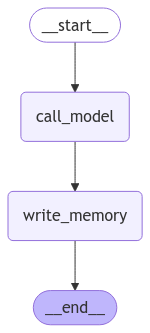

In [21]:
from IPython.display import Image, display

from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import StateGraph, MessagesState, START, END
from langchain_core.runnables.config import RunnableConfig
from langgraph.checkpoint.memory import MemorySaver
from langgraph.store.base import BaseStore

# Initialize the model
model = ChatOpenAI(model="gpt-4o", temperature=0)

# Schema 
class UserProfile(BaseModel):
    """ Profile of a user """
    user_name: str = Field(description="The user's preferred name")
    user_location: str = Field(description="The user's location")
    interests: list = Field(description="A list of the user's interests")

# Create the extractor
trustcall_extractor = create_extractor(
    model,
    tools=[UserProfile],
    tool_choice="UserProfile", # Enforces use of the UserProfile tool
)

# Chatbot instruction
MODEL_SYSTEM_MESSAGE = """You are a helpful assistant with memory that provides information about the user. 
If you have memory for this user, use it to personalize your responses.
Here is the memory (it may be empty): {memory}"""

# Extraction instruction
TRUSTCALL_INSTRUCTION = """Create or update the memory (JSON doc) to incorporate information from the following conversation:"""

def call_model(state: MessagesState, config: RunnableConfig, store: BaseStore):

    """Load memory from the store and use it to personalize the chatbot's response."""
    
    # Get the user ID from the config
    user_id = config["configurable"]["user_id"]

    # Retrieve memory from the store
    namespace = ("memory", user_id)
    existing_memory = store.get(namespace, "user_memory")

    # Format the memories for the system prompt
    if existing_memory and existing_memory.value:
        memory_dict = existing_memory.value
        formatted_memory = (
            f"Name: {memory_dict.get('user_name', 'Unknown')}\n"
            f"Location: {memory_dict.get('user_location', 'Unknown')}\n"
            f"Interests: {', '.join(memory_dict.get('interests', []))}"      
        )
    else:
        formatted_memory = None

    # Format the memory in the system prompt
    system_msg = MODEL_SYSTEM_MESSAGE.format(memory=formatted_memory)

    # Respond using memory as well as the chat history
    response = model.invoke([SystemMessage(content=system_msg)]+state["messages"])

    return {"messages": response}

def write_memory(state: MessagesState, config: RunnableConfig, store: BaseStore):

    """Reflect on the chat history and save a memory to the store."""
    
    # Get the user ID from the config
    user_id = config["configurable"]["user_id"]

    # Retrieve existing memory from the store
    namespace = ("memory", user_id)
    existing_memory = store.get(namespace, "user_memory")
        
    # Get the profile as the value from the list, and convert it to a JSON doc
    existing_profile = {"UserProfile": existing_memory.value} if existing_memory else None
    
    # Invoke the extractor
    result = trustcall_extractor.invoke({"messages": [SystemMessage(content=TRUSTCALL_INSTRUCTION)]+state["messages"], "existing": existing_profile})
    
    # Get the updated profile as a JSON object
    updated_profile = result["responses"][0].model_dump()

    # Save the updated profile
    key = "user_memory"
    store.put(namespace, key, updated_profile)

# Define the graph
builder = StateGraph(MessagesState)
builder.add_node("call_model", call_model)
builder.add_node("write_memory", write_memory)
builder.add_edge(START, "call_model")
builder.add_edge("call_model", "write_memory")
builder.add_edge("write_memory", END)

# Store for long-term (across-thread) memory
across_thread_memory = InMemoryStore()

# Checkpointer for short-term (within-thread) memory
within_thread_memory = MemorySaver()

# Compile the graph with the checkpointer fir and store
graph = builder.compile(checkpointer=within_thread_memory, store=across_thread_memory)

# View
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

## How are we using TrustCall in the previous code?

The previous code demonstrates how **TrustCall** is used to **extract, update, and store structured user profiles** in a chatbot with **memory capabilities**. It integrates **LangGraph** for workflow management and uses **TrustCall** for **schema-based data extraction**. Here’s a simple explanation step-by-step:

#### Purpose of the Code
This chatbot:
1. **Extracts user information** (name, location, and interests) from conversations.  
2. **Stores the extracted data** in memory for **personalization** in future chats.  
3. **Updates memory incrementally** without regenerating the profile from scratch.  
4. Uses **TrustCall** to handle structured extraction efficiently.

#### Schema for User Profile
```python
class UserProfile(BaseModel):
    """ Profile of a user """
    user_name: str = Field(description="The user's preferred name")
    user_location: str = Field(description="The user's location")
    interests: list = Field(description="A list of the user's interests")
```
- **Defines the data structure** for storing user details.  
- Includes:
  - **`user_name`**: User’s preferred name.  
  - **`user_location`**: User’s location.  
  - **`interests`**: List of user interests.  

- Each field has a **description** to guide the AI when extracting information.

#### Create the TrustCall Extractor
```python
trustcall_extractor = create_extractor(
    model,
    tools=[UserProfile],
    tool_choice="UserProfile",
)
```
- Sets up **TrustCall** to extract data based on the **`UserProfile` schema**.  
- **`tool_choice`:** Ensures the AI only extracts fields specified in this schema, avoiding unrelated data.

#### Workflow Overview

**Step 1: Respond to Messages (call_model)**
```python
def call_model(state: MessagesState, config: RunnableConfig, store: BaseStore):
```
- **Loads memory** for the user from the store.  
- If memory exists, it formats the data to include:
  - **Name**  
  - **Location**  
  - **Interests**  
- The AI responds to the user while using this **memory for personalization**:
```python
response = model.invoke([SystemMessage(content=system_msg)]+state["messages"])
```

**Step 2: Update Memory (write_memory)**
```python
def write_memory(state: MessagesState, config: RunnableConfig, store: BaseStore):
```
- **Extracts new information** from the chat and **updates the memory**.  

**Key Steps:**
1. **Fetch Existing Memory:**
```python
existing_profile = {"UserProfile": existing_memory.value} if existing_memory else None
```
- Retrieves the current profile if it exists.  

2. **Invoke TrustCall Extractor:**
```python
result = trustcall_extractor.invoke({"messages": [SystemMessage(content=TRUSTCALL_INSTRUCTION)]+state["messages"], "existing": existing_profile})
```
- Uses TrustCall to:
  - Analyze chat messages.  
  - Update only the **relevant fields** in the profile, leaving others unchanged.  

3. **Save Updated Profile:**
```python
updated_profile = result["responses"][0].model_dump()
store.put(namespace, key, updated_profile)
```
- Converts the result into JSON and **saves it in memory**.

#### Memory Management

**Short-Term Memory (Session Memory)**
```python
within_thread_memory = MemorySaver()
```
- Keeps memory for **ongoing conversations** (temporary).  

**Long-Term Memory (Persistent Memory)**
```python
across_thread_memory = InMemoryStore()
```
- Stores **user profiles persistently** for **future sessions**.  

#### Workflow Graph
```python
builder = StateGraph(MessagesState)
```
- Defines a **state-based workflow** for the chatbot:
1. **START → call_model**:  
   - Respond to the user using existing memory.  
2. **call_model → write_memory**:  
   - Extract and update the user’s memory based on the latest conversation.  
3. **write_memory → END**:  
   - Store updated memory and end the workflow.

**Graph Visualization**
```python
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))
```
- Generates a **diagram** to visualize the chatbot’s workflow steps.

#### Example Scenario

**Input Conversation:**
```
Human: Hi, I'm Sarah.
AI: Nice to meet you, Sarah.
Human: I'm from New York and I love hiking and photography.
```

**Memory Update:**
```
{
    "user_name": "Sarah",
    "user_location": "New York",
    "interests": ["hiking", "photography"]
}
```

**Next Conversation:**
```
Human: Tell me about the best hiking trails near New York.
AI: Since you love hiking and you're based in New York, let me suggest a few great trails nearby...
```

## Well, let's see how this app works

In [22]:
# We supply a thread ID for short-term (within-thread) memory
# We supply a user ID for long-term (across-thread) memory 
config = {"configurable": {"thread_id": "1", "user_id": "1"}}

# User input 
input_messages = [HumanMessage(content="Hi, my name is Julio")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

Hi, my name is Julio
================================== Ai Message ==================================

Hello, Julio! It's nice to meet you. How can I assist you today?


In [23]:
# User input 
input_messages = [HumanMessage(content="I'm interested in Gen AI Startups")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

I'm interested in Gen AI Startups
================================== Ai Message ==================================

That's great, Julio! Generative AI is a rapidly growing field with a lot of exciting developments. Are you looking for information on specific startups, trends in the industry, or perhaps advice on getting involved with a generative AI startup? Let me know how I can help!


In [24]:
# Namespace for the memory to save
user_id = "1"
namespace = ("memory", user_id)
existing_memory = across_thread_memory.get(namespace, "user_memory")
existing_memory.dict()

{'value': {'user_name': 'Julio',
  'user_location': '',
  'interests': ['Gen AI Startups']},
 'key': 'user_memory',
 'namespace': ['memory', '1'],
 'created_at': '2025-01-07T10:04:01.754010+00:00',
 'updated_at': '2025-01-07T10:04:01.754012+00:00'}

In [25]:
# The user profile saved as a JSON object
existing_memory.value

{'user_name': 'Julio', 'user_location': '', 'interests': ['Gen AI Startups']}

In [27]:
# User input 
input_messages = [HumanMessage(content="I am also interested in the latest trends about AI Agents")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

I am also interested in the latest trends about AI Agents
================================== Ai Message ==================================

AI agents are evolving rapidly, and several key trends are shaping their development and application:

1. **Increased Autonomy**: AI agents are becoming more autonomous, capable of performing complex tasks without human intervention. This includes decision-making, problem-solving, and adapting to new environments.

2. **Multi-Modal Capabilities**: AI agents are increasingly integrating multiple types of data, such as text, images, and audio, to provide more comprehensive and context-aware interactions.

3. **Personalization**: There's a growing focus on creating AI agents that can tailor their interactions and responses based on individual user preferences and behaviors, enhancing user experience.

4. **Ethical and Responsible AI**: As AI agents become more prevalent,

## Let's review what we just did

This code demonstrates how the chatbot **collects, updates, and retrieves user preferences** using the **graph workflow** and **TrustCall extractor** set up earlier. It uses both **short-term (session-specific)** and **long-term (persistent)** memory to **personalize responses** and **incrementally update the user profile**. Here's a simple explanation step-by-step:

#### Configure Memory Settings
```python
config = {"configurable": {"thread_id": "1", "user_id": "1"}}
```
- **Thread ID (`thread_id`)**: Tracks **short-term memory** within the current conversation (session).  
- **User ID (`user_id`)**: Tracks **long-term memory** across multiple sessions.  
- Ensures data is **stored and retrieved** based on the user ID ("1").

#### First User Input - Name
```python
input_messages = [HumanMessage(content="Hi, my name is Julio")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()
```

**What happens here?**
1. **Input Message**: The user says their name is "Julio".  
2. **Graph Workflow**:
   - **Step 1:** Responds to the user using existing memory (currently empty).  
   - **Step 2:** Updates the memory to save **"Julio"** as the **user_name**.  
3. **Output**: The AI responds, e.g., *"Hi Julio! Nice to meet you!"*  


#### Second User Input - Interest in Gen AI Startups
```python
input_messages = [HumanMessage(content="I'm interested in Gen AI Startups")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()
```

**What happens here?**
1. **Input Message**: The user adds their interest in **Gen AI Startups**.  
2. **Graph Workflow**:
   - **Step 1:** Responds based on existing memory (user_name = Julio).  
   - **Step 2:** Updates the memory, adding **"Gen AI Startups"** to the **interests** list.  
3. **Output**: The AI responds, e.g., *"That's great, Julio! Gen AI Startups are fascinating."*


#### Retrieve and Inspect Memory
```python
user_id = "1"
namespace = ("memory", user_id)
existing_memory = across_thread_memory.get(namespace, "user_memory")
existing_memory.dict()
existing_memory.value
```

**What happens here?**
1. **Retrieve Memory**:
   - Fetches the saved profile for the user (ID = 1) from **long-term memory**.  
2. **Memory Contents**:
   - Displays the profile as a **JSON object**:
   ```json
   {
       "user_name": "Julio",
       "user_location": null,
       "interests": ["Gen AI Startups"]
   }
   ```
3. **Key Observations**:
   - **Incremental Updates**: Memory only added **new data** (interest in Gen AI Startups) without overwriting existing data (user_name = Julio).  
   - **Preserves Missing Fields**: Keeps fields like **location** as **null** if no information is provided.


#### Third User Input - Additional Interest
```python
input_messages = [HumanMessage(content="I am also interested in the latest trends about AI Agents")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()
```

**What happens here?**
1. **Input Message**: The user adds **AI Agents** as another interest.  
2. **Graph Workflow**:
   - **Step 1:** Responds using the updated memory (user_name = Julio, interests = ["Gen AI Startups"]).  
   - **Step 2:** Updates the memory, **appending** **"AI Agents"** to the **interests** list.  
3. **Output**: The AI responds, e.g., *"AI Agents are a hot topic, Julio! Great addition to your interests."*


#### Updated Memory After Third Input
```json
{
    "user_name": "Julio",
    "user_location": null,
    "interests": ["Gen AI Startups", "AI Agents"]
}
```

#### Final Thoughts

This code demonstrates how the chatbot:
1. **Remembers user preferences** across sessions using memory.  
2. **Adds new information incrementally** without overwriting old data.  
3. **Extracts and organizes user details** using **TrustCall** into a **structured schema**.  
4. **Personalizes interactions**, making conversations more natural and user-friendly.

## Looks good! Once we know that our chatbot has this more structured long-time memory, we can now continue our conversation

In [28]:
# We supply a thread ID for short-term (within-thread) memory
# We supply a user ID for long-term (across-thread) memory 
config = {"configurable": {"thread_id": "2", "user_id": "1"}}

# User input 
input_messages = [HumanMessage(content="What online magazines do you recommend for me?")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

What online magazines do you recommend for me?
================================== Ai Message ==================================

Given your interests in Gen AI Startups and AI Agent Startups, I recommend the following online magazines and publications:

1. **TechCrunch** - They frequently cover the latest in technology startups, including AI and machine learning innovations.

2. **VentureBeat** - Known for its focus on transformative technology, VentureBeat often features articles on AI advancements and startup news.

3. **Wired** - While it covers a broad range of tech topics, Wired often delves into AI and the impact of technology on society.

4. **MIT Technology Review** - Offers in-depth articles on emerging technologies, including AI and its applications in various industries.

5. **AI Trends** - Specifically focused on AI, this publication provides insights into the latest trends and developments in

## How to execute the code from Visual Studio Code
* In Visual Studio Code, see the file 026-profile-schema.py
* In terminal, make sure you are in the directory of the file and run:
    * python 026-profile-schema.py